# 서울시 구별 CCTV 현황 분석

In [1]:
import pandas as pd
import numpy as np

## 1-1. CSV 파일 읽기 - 서울시 CCTV 현황

In [2]:
CCTV_Seoul = pd.read_csv('CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [3]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
CCTV_Seoul.columns[0]

'기관명'

In [5]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, # 컬럼 이름 변경
                  inplace=True) # 변수 내용 갱신
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


## 1-2. Excel 파일 읽기 - 서울시 인구 현황

In [6]:
pop_Seoul = pd.read_excel('population_in_Seoul.xls', encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2019.1/4,합계,4290922,10054979,4909387,5145592,9770216,4772134,4998082,284763,137253,147510,2.28,1436125
3,2019.1/4,종로구,73914,162913,78963,83950,152778,74536,78242,10135,4427,5708,2.07,26981
4,2019.1/4,중구,61800,135836,66720,69116,125942,61992,63950,9894,4728,5166,2.04,22421


In [7]:
pop_Seoul = pd.read_excel('population_in_Seoul.xls', header = 2, usecols = 'B, D, G, J, N', encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10054979,9770216,284763,1436125
1,종로구,162913,152778,10135,26981
2,중구,135836,125942,9894,22421
3,용산구,245139,229168,15971,38049
4,성동구,314608,306404,8204,43076


In [8]:
pop_Seoul.rename(columns = {pop_Seoul.columns[0] : '구별',
                            pop_Seoul.columns[1] : '인구수',
                            pop_Seoul.columns[2] : '한국인',
                            pop_Seoul.columns[3] : '외국인',
                            pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10054979,9770216,284763,1436125
1,종로구,162913,152778,10135,26981
2,중구,135836,125942,9894,22421
3,용산구,245139,229168,15971,38049
4,성동구,314608,306404,8204,43076


## 2-1. CCTV 데이터 파악

In [9]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [10]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [11]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


### * 최근 3년간 CCTV 증가율 계산

In [12]:
CCTV_Seoul['최근 증가율'] = (CCTV_Seoul['2014년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2016년']) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by='최근 증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


## 2-2. 인구 데이터 파악

In [13]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10054979,9770216,284763,1436125
1,종로구,162913,152778,10135,26981
2,중구,135836,125942,9894,22421
3,용산구,245139,229168,15971,38049
4,성동구,314608,306404,8204,43076


In [14]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162913,152778,10135,26981
2,중구,135836,125942,9894,22421
3,용산구,245139,229168,15971,38049
4,성동구,314608,306404,8204,43076
5,광진구,370658,354873,15785,46288


In [15]:
pop_Seoul['구별'].unique() # 반복된 데이터는 하나로 나타냄

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [16]:
pop_Seoul[pop_Seoul['구별'].isnull()] # NaN 데이터 추출

,구별,인구수,한국인,외국인,고령자


### * 구별 '외국인 비율' & '고령자 비율' 계산

In [17]:
pop_Seoul['외국인 비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자 비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,162913,152778,10135,26981,6.221112,16.561600
2,중구,135836,125942,9894,22421,7.283783,16.505934
3,용산구,245139,229168,15971,38049,6.515079,15.521398
4,성동구,314608,306404,8204,43076,2.607690,13.691960
5,광진구,370658,354873,15785,46288,4.258643,12.488062


In [18]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
24,송파구,685361,678521,6840,83492,0.998014,12.182193
16,강서구,602886,596287,6599,80903,1.094568,13.419287
23,강남구,546875,541854,5021,68104,0.918126,12.453303
11,노원구,545486,541174,4312,78170,0.790488,14.330340
21,관악구,520645,502615,18030,73005,3.463012,14.022030


In [19]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
19,영등포구,404556,368824,35732,56463,8.832399,13.956782
17,구로구,438889,404726,34163,63017,7.783973,14.358300
18,금천구,254244,233981,20263,36301,7.969903,14.278016
21,관악구,520645,502615,18030,73005,3.463012,14.022030
6,동대문구,363262,346750,16512,57570,4.545480,15.848066


In [20]:
pop_Seoul.sort_values(by='외국인 비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
19,영등포구,404556,368824,35732,56463,8.832399,13.956782
18,금천구,254244,233981,20263,36301,7.969903,14.278016
17,구로구,438889,404726,34163,63017,7.783973,14.358300
2,중구,135836,125942,9894,22421,7.283783,16.505934
3,용산구,245139,229168,15971,38049,6.515079,15.521398


In [21]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
24,송파구,685361,678521,6840,83492,0.998014,12.182193
16,강서구,602886,596287,6599,80903,1.094568,13.419287
12,은평구,488713,484274,4439,78406,0.908304,16.043363
11,노원구,545486,541174,4312,78170,0.790488,14.330340
21,관악구,520645,502615,18030,73005,3.463012,14.022030


In [22]:
pop_Seoul.sort_values(by='고령자 비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
9,강북구,321151,317386,3765,58858,1.172346,18.327204
10,도봉구,340089,337820,2269,56742,0.667178,16.684456
1,종로구,162913,152778,10135,26981,6.221112,16.561600
2,중구,135836,125942,9894,22421,7.283783,16.505934
12,은평구,488713,484274,4439,78406,0.908304,16.043363


## 3. CCTV 데이터와 인구 현황 데이터를 합치고 분석
* drop: 행 방향 삭제
* del: 열 방향 삭제

In [23]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,3238,1292,430,584,932,150.619195,546875,541854,5021,68104,0.918126,12.453303
1,강동구,1010,379,99,155,377,166.490765,429601,425267,4334,59742,1.008843,13.906392
2,강북구,831,369,120,138,204,125.203252,321151,317386,3765,58858,1.172346,18.327204
3,강서구,911,388,258,184,81,134.793814,602886,596287,6599,80903,1.094568,13.419287
4,관악구,2109,846,260,390,613,149.290780,520645,502615,18030,73005,3.463012,14.022030


In [24]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,3238,150.619195,546875,541854,5021,68104,0.918126,12.453303
1,강동구,1010,166.490765,429601,425267,4334,59742,1.008843,13.906392
2,강북구,831,125.203252,321151,317386,3765,58858,1.172346,18.327204
3,강서구,911,134.793814,602886,596287,6599,80903,1.094568,13.419287
4,관악구,2109,149.290780,520645,502615,18030,73005,3.463012,14.022030


In [25]:
data_result.set_index('구별', inplace=True) # index 설정
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,3238,150.619195,546875,541854,5021,68104,0.918126,12.453303
강동구,1010,166.490765,429601,425267,4334,59742,1.008843,13.906392
강북구,831,125.203252,321151,317386,3765,58858,1.172346,18.327204
강서구,911,134.793814,602886,596287,6599,80903,1.094568,13.419287
관악구,2109,149.290780,520645,502615,18030,73005,3.463012,14.022030


### * 상관계수 조사
* 상관계수의 <u>절대값이 클수록</u> 두 데이터는 <u>관계가 있다</u>고 볼 수 있음
* 0.1 이하면 거의 무시, 0.3 이하면 약한 상관관계, 0.7 이하면 뚜렷한 상관관계

In [26]:
np.corrcoef(data_result['고령자 비율'], data_result['소계']) # 약한 음의 상관관계

array([[ 1.        , -0.28134716],
       [-0.28134716,  1.        ]])

In [27]:
np.corrcoef(data_result['외국인 비율'], data_result['소계']) # 뚜렷한 음의 상관관계 (한 쪽이 증가하면 다른 쪽은 감소)

array([[ 1.        , -0.05210682],
       [-0.05210682,  1.        ]])

In [28]:
np.corrcoef(data_result['인구수'], data_result['소계']) # 약한 양의 상관관계

array([[1.        , 0.21773943],
       [0.21773943, 1.        ]])

In [29]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,3238,150.619195,546875,541854,5021,68104,0.918126,12.453303
양천구,2482,34.671731,466622,462599,4023,58930,0.862154,12.629066
서초구,2297,63.371266,437007,432762,4245,55366,0.971380,12.669362
관악구,2109,149.290780,520645,502615,18030,73005,3.463012,14.022030
은평구,2108,85.237258,488713,484274,4439,78406,0.908304,16.043363


In [30]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
송파구,1081,104.347826,685361,678521,6840,83492,0.998014,12.182193
강서구,911,134.793814,602886,596287,6599,80903,1.094568,13.419287
강남구,3238,150.619195,546875,541854,5021,68104,0.918126,12.453303
노원구,1566,188.929889,545486,541174,4312,78170,0.790488,14.330340
관악구,2109,149.290780,520645,502615,18030,73005,3.463012,14.022030


In [31]:
data_result.sort_values(by='외국인 비율', ascending=False).head(5)

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
영등포구,1277,157.979798,404556,368824,35732,56463,8.832399,13.956782
금천구,1348,100.000000,254244,233981,20263,36301,7.969903,14.278016
구로구,1884,64.973730,438889,404726,34163,63017,7.783973,14.358300
중구,1023,147.699758,135836,125942,9894,22421,7.283783,16.505934
용산구,2096,53.216374,245139,229168,15971,38049,6.515079,15.521398


## 4. CCTV 현황 그래프로 분석

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows': # Windows 체제에서 한글 폰트 변경
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry!')

In [33]:
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,3238,150.619195,546875,541854,5021,68104,0.918126,12.453303
강동구,1010,166.490765,429601,425267,4334,59742,1.008843,13.906392
강북구,831,125.203252,321151,317386,3765,58858,1.172346,18.327204
강서구,911,134.793814,602886,596287,6599,80903,1.094568,13.419287
관악구,2109,149.290780,520645,502615,18030,73005,3.463012,14.022030


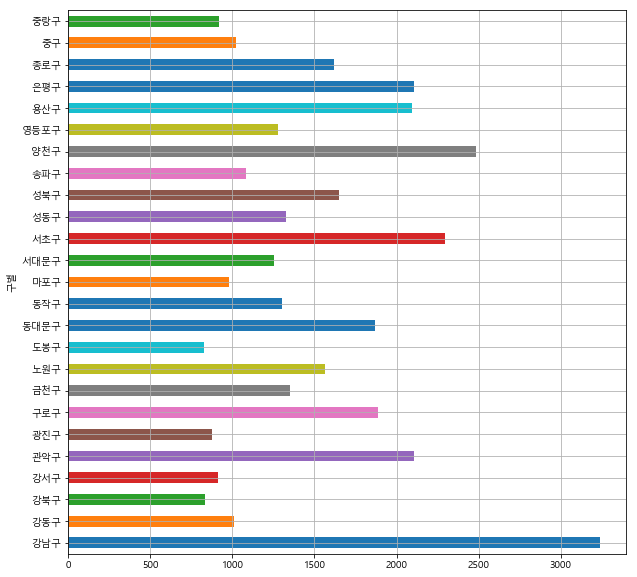

In [34]:
data_result['소계'].plot(kind='barh', grid=True, figsize=(10, 10)) # 수평바, 그리드 적용
plt.show()

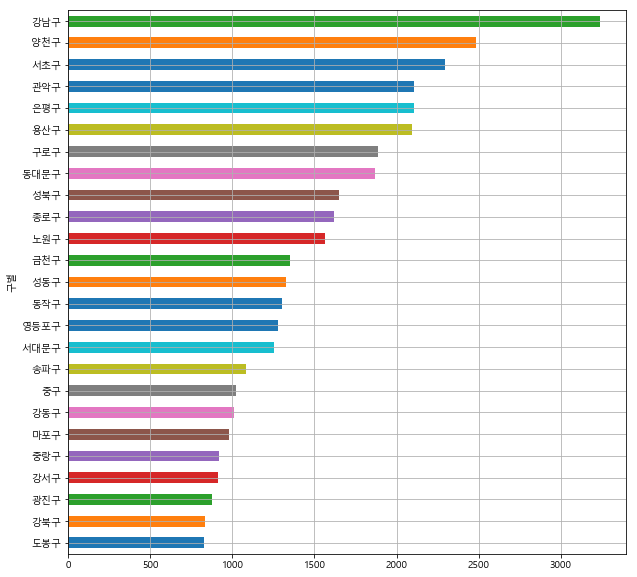

In [35]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

### * 인구 대비 CCTV 비율 계산 후 정렬

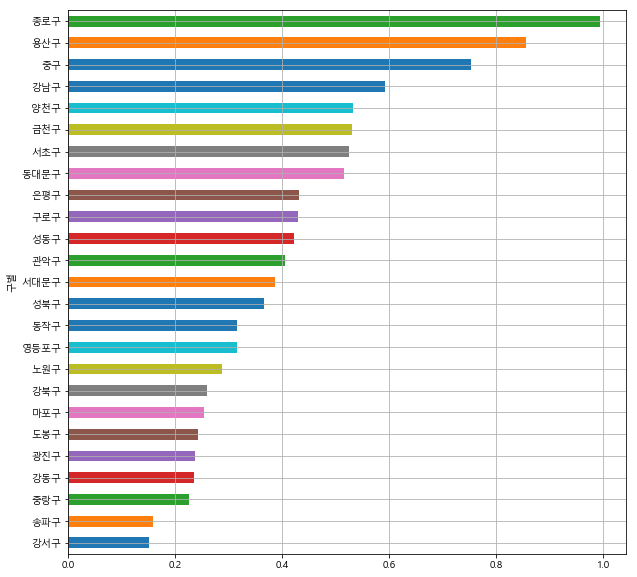

In [36]:
data_result['CCTV 비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV 비율'].sort_values().plot(kind='barh', grid=True, figsize=(10, 10))
plt.show()

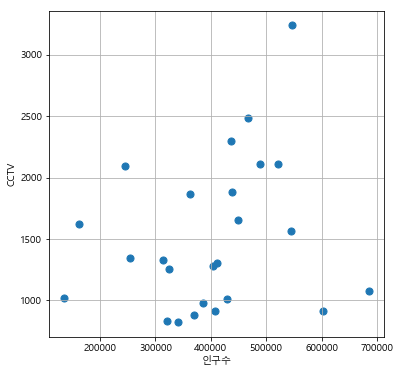

In [37]:
plt.figure(figsize=(6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50) # scatter 함수 적용
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [38]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1) # 데이터를 대표하는 직선 만듦
fp1

array([1.04688835e-03, 1.09426238e+03])

In [39]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

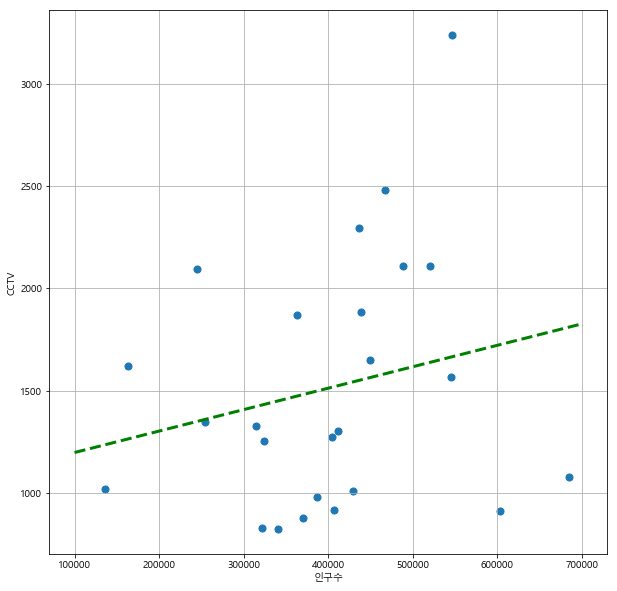

In [40]:
plt.figure(figsize=(10, 10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

## 5. 설득력 있는 자료로 만들기

In [41]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수'])) # 오차 계산

df_sort = data_result.sort_values(by='오차', ascending=False) # 데이터 정렬
df_sort.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,546875,541854,5021,68104,0.918126,12.453303,0.592091,1571.220548
양천구,2482,34.671731,466622,462599,4023,58930,0.862154,12.629066,0.531908,899.236479
강서구,911,134.793814,602886,596287,6599,80903,1.094568,13.419287,0.151107,814.416716
서초구,2297,63.371266,437007,432762,4245,55366,0.971380,12.669362,0.525621,745.240078
용산구,2096,53.216374,245139,229168,15971,38049,6.515079,15.521398,0.855025,745.104452


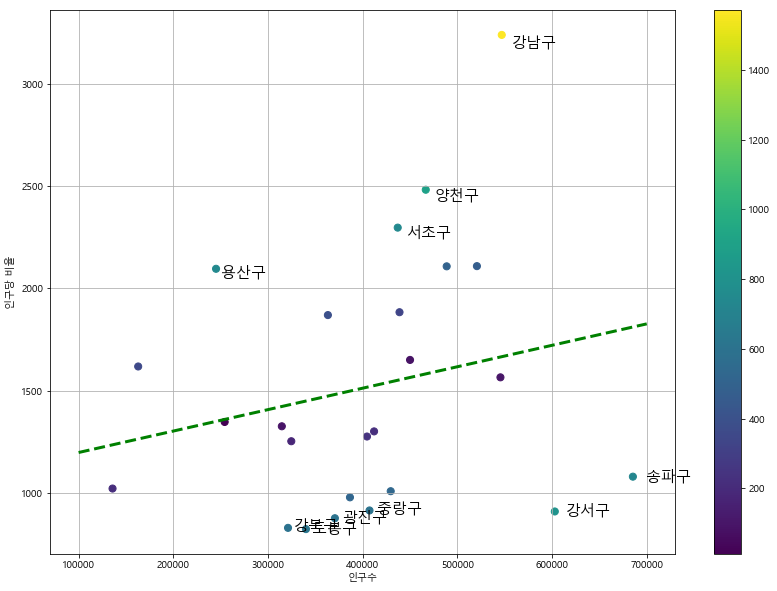

In [42]:
plt.figure(figsize=(14, 10))
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당 비율')
plt.colorbar()
plt.grid()
plt.show()